In [2]:
#!/usr/bin/python3

#Imports
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [63]:
# Load Lawful Permanent Residents 2020 Data Tables
# Data from: https://www.dhs.gov/immigration-statistics/yearbook/2020
directory = "./data/lawful2020/"

# Title: PERSONS OBTAINING LAWFUL PERMANENT RESIDENT STATUS: FISCAL YEARS 1820 TO 2020
lawful2020_table1_in = pd.read_excel(directory + "fy2020_table1.xlsx", skiprows=3, nrows=60)

# Reformat into 2 columns: Year and Number
lawful2020_table1 = pd.DataFrame(columns=['Year', 'Number'])
lawful2020_table1['Year'] = lawful2020_table1_in['Year']
lawful2020_table1['Number'] = lawful2020_table1_in['Number']
for i in range(3):
    temp = pd.DataFrame(columns=['Year','Number'])
    current_col_year = 'Year.' + str(i + 1)
    current_col_number = 'Number.' + str(i + 1)
    temp['Year'] = lawful2020_table1_in[current_col_year]
    temp['Number'] = lawful2020_table1_in[current_col_number]
    lawful2020_table1 = pd.concat([lawful2020_table1, temp])
    
# Remove rows with NaN
lawful2020_table1 = lawful2020_table1.dropna()

# Modify one instance of a string
lawful2020_table1.loc[lawful2020_table1['Year'] == "1976¹"] = 1976

print(lawful2020_table1.describe())

             Number
count  2.010000e+02
mean   4.288578e+05
std    3.651173e+05
min    1.976000e+03
25%    1.411320e+05
50%    3.216250e+05
75%    6.033220e+05
max    1.826595e+06


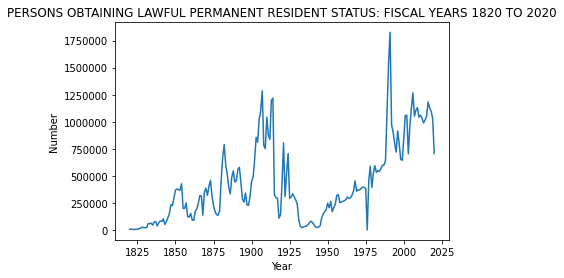

In [64]:
# Plot simple chart
plt.plot(lawful2020_table1['Year'], lawful2020_table1['Number'])
plt.xlabel("Year")
plt.ylabel("Number")
plt.title("PERSONS OBTAINING LAWFUL PERMANENT RESIDENT STATUS: FISCAL YEARS 1820 TO 2020")
plt.ticklabel_format(style='plain')
plt.show()

Here, we can see a general upward trend for persons obtaining lawful permanent resident status over the past 200 years in the United States.

In [65]:
# Load Lawful Permanent Residents 2020 Supplementary Data Tables

# Title: PERSONS OBTAINING LAWFUL PERMANENT RESIDENT STATUS: FISCAL YEARS 1820 TO 2020
lawful2020_table2_in = pd.read_excel(directory + "fy2020_table2.xlsx", skiprows=3, nrows=88)
df = lawful2020_table2_in

# Make sure all column names are strings (2020 label saved as int)
df = df.rename(columns={2020:'2020'})

# Rename a column
df = df.rename(columns={"Region and country of last residence1": "Region"})

# Rename a row element
df.iloc[87]['Region'] = 'Not Specified'

# Replace NaN with 0, replace dashes with 0
df = df.fillna(0)
df.loc[:, df.columns != 'Region'] = df.loc[:, df.columns != 'Region'].replace('-',0, regex=True)

# Combine 2010-2019 and 2020 columns
df['2010 to 2020'] = df['2010 to 2019'] + df['2020']

# Remove a column
df = df.drop('2010 to 2019', axis=1)
df = df.drop('2020', axis=1)

print(df.head())

               Region 1820 to 1829 1830 to 1839 1840 to 1849 1850 to 1859  \
0               Total       128502       538381      1427337      2814554   
1              Europe        99618       422853      1369423      2622617   
2  Austria-Hungary2,3            0            0            0            0   
3          Austria2,3            0            0            0            0   
4          Hungary2,3            0            0            0            0   

  1860 to 1869 1870 to 1879 1880 to 1889 1890 to 1899 1900 to 1909  ...  \
0      2081261      2742137      5248568      3694294      8202388  ...   
1      1880389      2252050      4638684      3576411      7572569  ...   
2         3375        60127       314787       534059      2001376  ...   
3         2700        54529       204805       268218       532416  ...   
4          483         5598       109982       203350       685567  ...   

  1920 to 1929 1930 to 1939 1940 to 1949 1950 to 1959 1960 to 1969  \
0      4295510  

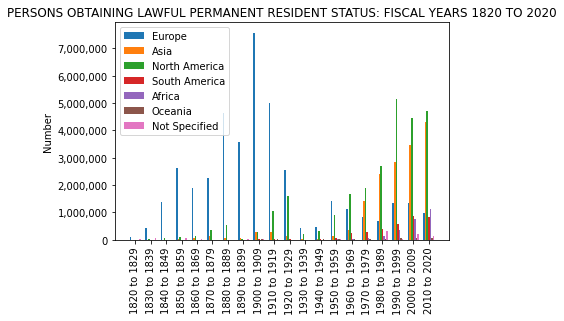

In [66]:
# Create plot of persons by continent

continent_data = df[(df['Region'] == 'Europe') | (df['Region'] == 'Asia') | (df['Region'] == 'America') | (df['Region'] == 'South America') | (df['Region'] == 'Africa') | (df['Region'] == 'Oceania') | (df['Region'] == 'Not Specified')]

labels = continent_data.iloc[:, 0].tolist()
europe_data = continent_data.iloc[0,1:].tolist()
asia_data = continent_data.iloc[1,1:].tolist()
america_data = continent_data.iloc[2,1:].tolist()
sa_data = continent_data.iloc[3,1:].tolist()
africa_data = continent_data.iloc[4,1:].tolist()
oceania_data = continent_data.iloc[5,1:].tolist()
other_data = continent_data.iloc[6,1:].tolist()

bar_labels = continent_data.columns.tolist()
bar_labels = bar_labels[1:]

x = np.arange(len(europe_data))
width = 0.1
fig, ax = plt.subplots()

europe_bars = ax.bar((x - (3 * width)), europe_data, width, label='Europe')
asia_bars = ax.bar((x - (2 * width)), asia_data, width, label='Asia')
america_bars = ax.bar((x - (1 * width)), america_data, width, label='North America')
sa_bars = ax.bar(x, sa_data, width, label='South America')
africa_bars = ax.bar((x + (1 * width)), africa_data, width, label='Africa')
oceania_bars = ax.bar((x + (2 * width)), oceania_data, width, label='Oceania')
other_bars = ax.bar((x + (3 * width)), other_data, width, label='Not Specified')

ax.set_xticks(x, bar_labels, rotation='vertical')
ax.set_ylabel('Number')
ax.set_title('PERSONS OBTAINING LAWFUL PERMANENT RESIDENT STATUS: FISCAL YEARS 1820 TO 2020')
ax.legend()

ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, a: format(int(x), ',')))

plt.show()


You'll have to zoom in to properly see the bars, but we can see general immigration trends by continent over the past 200 years.

In [67]:
# Load ancestry census data from 2020
# Data from: https://data.census.gov/cedsci/table?q=nationality&tid=ACSDP5Y2020.DP02
directory = "./data/census2020/"

# Import correct sheet in file
df = pd.read_excel(directory + 'ancestryCensus2020.xlsx', sheet_name="Data", skiprows=141, nrows=28)

# Rename column names
df = df.rename(columns={"ANCESTRY": "Ancestry", "Unnamed: 1": "Number", "Unnamed: 2": "Margin of Error", "Unnamed: 3": "Percent", "Unnamed: 4": "Percent Margin of Error"})

print(df.head())

           Ancestry       Number Margin of Error      Percent  \
0  Total population  326,569,308           *****  326,569,308   
1          American   19,364,103         ±65,490         5.9%   
2              Arab    2,056,594         ±27,520         0.6%   
3             Czech    1,329,130         ±11,870         0.4%   
4            Danish    1,244,498         ±12,074         0.4%   

  Percent Margin of Error  
0                     (X)  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


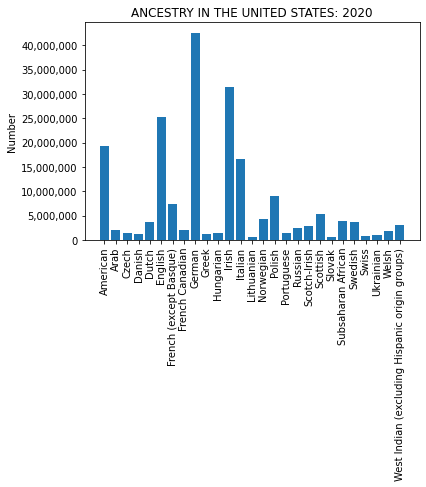

In [68]:
# Use "Number" column to make a bar graph
labels = df['Ancestry'].tolist()[1:]
population_data = df['Number'].tolist()[1:]
    
population_data = [int(x.replace(',', '')) for x in population_data]

x = np.arange(len(labels))
fig, ax = plt.subplots()
ax.bar(x, population_data)

ax.set_xticks(x, labels, rotation='vertical')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, a: format(int(x), ',')))

plt.ylabel("Number")
plt.title("ANCESTRY IN THE UNITED STATES: 2020")

plt.show()

In [69]:
# Load ancestry census data from 2019


# Import correct sheet in file
df = pd.read_csv('./data/5yr/2019_5yr.csv', skiprows=141, nrows = 25)
df.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names
# df = df.rename(columns={"ANCESTRY": "Ancestry", "Unnamed: 1": "Number", "Unnamed: 2": "Margin of Error", "Unnamed: 3": "Percent", "Unnamed: 4": "Percent Margin of Error"})

print(df.head())

          Ancestry      Number Margin of Error Percent Percent Margin of Error
0             Arab   2,009,626         ±28,918    0.6%                    ±0.1
1            Czech   1,358,610          ±9,400    0.4%                    ±0.1
2           Danish   1,265,727         ±10,337    0.4%                    ±0.1
3            Dutch   3,872,651         ±18,708    1.2%                    ±0.1
4          English  23,493,906         ±68,617    7.2%                    ±0.1


<AxesSubplot:xlabel='Ancestry'>

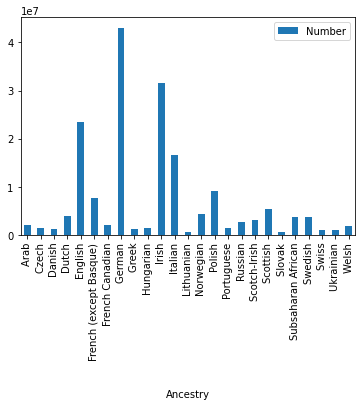

In [70]:
labels = df['Ancestry'][1:]
population_data = df['Number'][1:]
df.replace(',','', regex=True, inplace=True)
df['Number'] = df['Number'].astype(int)
df.plot(x="Ancestry", y=["Number"], kind="bar")

                         Ancestry      Number Margin of Error Percent  \
0                           Czech   1,382,835          ±9,921    0.4%   
1                          Danish   1,278,457          ±9,713    0.4%   
2                           Dutch   4,009,279         ±19,942    1.2%   
3                         English  23,638,645         ±68,367    7.3%   
4          French (except Basque)   7,815,721         ±29,213    2.4%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

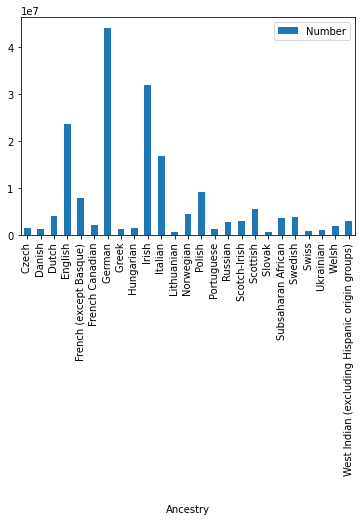

In [71]:
# Load ancestry census data from 2018


# Import correct sheet in file
df = pd.read_csv('./data/5yr/2018_5yr.csv', skiprows=141, nrows = 25)
df.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names
# df = df.rename(columns={"ANCESTRY": "Ancestry", "Unnamed: 1": "Number", "Unnamed: 2": "Margin of Error", "Unnamed: 3": "Percent", "Unnamed: 4": "Percent Margin of Error"})

print(df.head())
labels = df['Ancestry'][1:]
population_data = df['Number'][1:]
df.replace(',','', regex=True, inplace=True)
df['Number'] = df['Number'].astype(int)
df.plot(x="Ancestry", y=["Number"], kind="bar")

                         Ancestry      Number Margin of Error Percent  \
0                           Czech   1,410,576          ±9,770    0.4%   
1                          Danish   1,294,689         ±10,692    0.4%   
2                           Dutch   4,121,110         ±18,904    1.3%   
3                         English  23,977,180         ±66,691    7.5%   
4          French (except Basque)   7,997,196         ±25,452    2.5%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

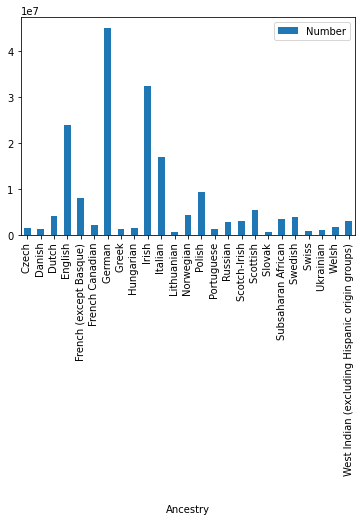

In [72]:
# Load ancestry census data from 2017


# Import correct sheet in file
df = pd.read_csv('./data/5yr/2017_5yr.csv', skiprows=141, nrows = 25)
df.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names
# df = df.rename(columns={"ANCESTRY": "Ancestry", "Unnamed: 1": "Number", "Unnamed: 2": "Margin of Error", "Unnamed: 3": "Percent", "Unnamed: 4": "Percent Margin of Error"})

print(df.head())
labels = df['Ancestry'][1:]
population_data = df['Number'][1:]
df.replace(',','', regex=True, inplace=True)
df['Number'] = df['Number'].astype(int)
df.plot(x="Ancestry", y=["Number"], kind="bar")

                         Ancestry      Number Margin of Error Percent  \
0                           Czech   1,435,359          ±8,933    0.5%   
1                          Danish   1,297,738         ±11,493    0.4%   
2                           Dutch   4,210,787         ±18,159    1.3%   
3                         English  24,426,623         ±61,981    7.7%   
4          French (except Basque)   8,151,499         ±25,958    2.6%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

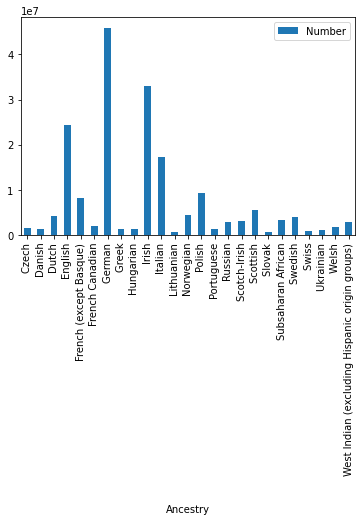

In [73]:
# Load ancestry census data from 2016


# Import correct sheet in file
df = pd.read_csv('./data/5yr/2016_5yr.csv', skiprows=141, nrows = 25)
df.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names
# df = df.rename(columns={"ANCESTRY": "Ancestry", "Unnamed: 1": "Number", "Unnamed: 2": "Margin of Error", "Unnamed: 3": "Percent", "Unnamed: 4": "Percent Margin of Error"})

print(df.head())
labels = df['Ancestry'][1:]
population_data = df['Number'][1:]
df.replace(',','', regex=True, inplace=True)
df['Number'] = df['Number'].astype(int)
df.plot(x="Ancestry", y=["Number"], kind="bar")

                         Ancestry      Number Margin of Error Percent  \
0                           Czech   1,452,344         ±10,370    0.5%   
1                          Danish   1,307,381          ±9,289    0.4%   
2                           Dutch   4,289,116         ±17,121    1.4%   
3                         English  24,787,018         ±52,368    7.8%   
4          French (except Basque)   8,272,538         ±24,827    2.6%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

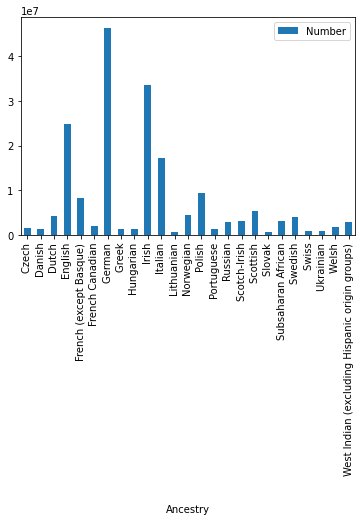

In [74]:
# Load ancestry census data from 2015


# Import correct sheet in file
df = pd.read_csv('./data/5yr/2015_5yr.csv', skiprows=141, nrows = 25)
df.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names
# df = df.rename(columns={"ANCESTRY": "Ancestry", "Unnamed: 1": "Number", "Unnamed: 2": "Margin of Error", "Unnamed: 3": "Percent", "Unnamed: 4": "Percent Margin of Error"})

print(df.head())
labels = df['Ancestry'][1:]
population_data = df['Number'][1:]
df.replace(',','', regex=True, inplace=True)
df['Number'] = df['Number'].astype(int)
df.plot(x="Ancestry", y=["Number"], kind="bar")

                         Ancestry      Number Margin of Error Percent  \
0                           Czech   1,479,588         ±11,823    0.5%   
1                          Danish   1,323,182         ±10,809    0.4%   
2                           Dutch   4,387,814         ±18,649    1.4%   
3                         English  25,181,294         ±59,031    8.0%   
4          French (except Basque)   8,431,568         ±25,741    2.7%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

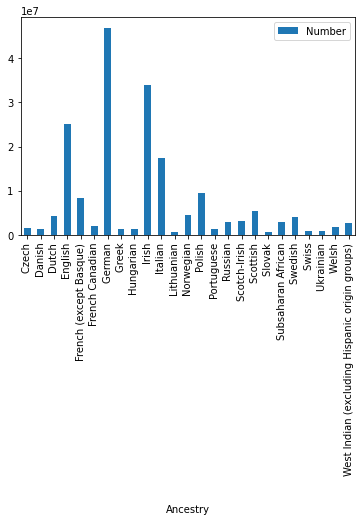

In [75]:
# Load ancestry census data from 2014


# Import correct sheet in file
df = pd.read_csv('./data/5yr/2014_5yr.csv', skiprows=141, nrows = 25)
df.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names
# df = df.rename(columns={"ANCESTRY": "Ancestry", "Unnamed: 1": "Number", "Unnamed: 2": "Margin of Error", "Unnamed: 3": "Percent", "Unnamed: 4": "Percent Margin of Error"})

print(df.head())
labels = df['Ancestry'][1:]
population_data = df['Number'][1:]
df.replace(',','', regex=True, inplace=True)
df['Number'] = df['Number'].astype(int)
df.plot(x="Ancestry", y=["Number"], kind="bar")

                         Ancestry      Number Margin of Error Percent  \
0                           Czech   1,514,919         ±11,653    0.5%   
1                          Danish   1,360,858         ±10,385    0.4%   
2                           Dutch   4,533,617         ±17,674    1.5%   
3                         English  25,809,471         ±58,586    8.3%   
4          French (except Basque)   8,678,917         ±26,741    2.8%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

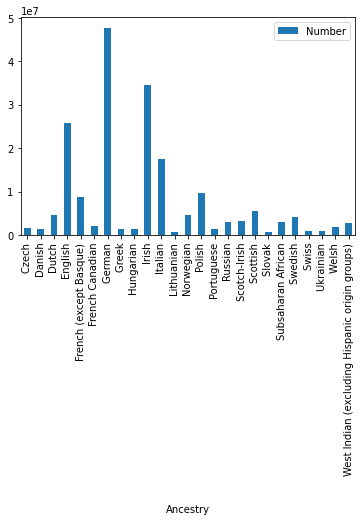

In [76]:
# Load ancestry census data from 2013


# Import correct sheet in file
df = pd.read_csv('./data/5yr/2013_5yr.csv', skiprows=141, nrows = 25)
df.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names
# df = df.rename(columns={"ANCESTRY": "Ancestry", "Unnamed: 1": "Number", "Unnamed: 2": "Margin of Error", "Unnamed: 3": "Percent", "Unnamed: 4": "Percent Margin of Error"})

print(df.head())
labels = df['Ancestry'][1:]
population_data = df['Number'][1:]
df.replace(',','', regex=True, inplace=True)
df['Number'] = df['Number'].astype(int)
df.plot(x="Ancestry", y=["Number"], kind="bar")

                     Ancestry      Number Margin of Error Percent  \
0                       Czech   1,543,224         ±10,124    0.5%   
1                      Danish   1,392,161         ±12,510    0.5%   
2                       Dutch   4,665,736         ±18,344    1.5%   
3                     English  26,360,639         ±64,183    8.5%   
4      French (except Basque)   8,902,996         ±29,988    2.9%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

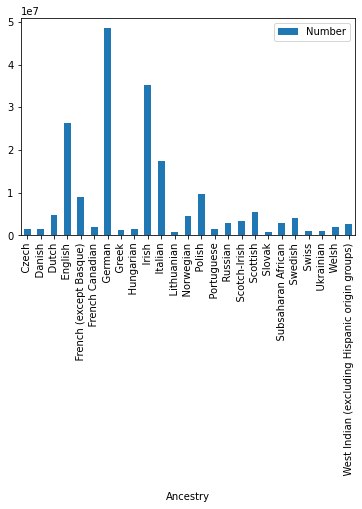

In [77]:
# Load ancestry census data from 2012


# Import correct sheet in file
df = pd.read_csv('./data/5yr/2012_5yr.csv', skiprows=141, nrows = 25)
df.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names
# df = df.rename(columns={"ANCESTRY": "Ancestry", "Unnamed: 1": "Number", "Unnamed: 2": "Margin of Error", "Unnamed: 3": "Percent", "Unnamed: 4": "Percent Margin of Error"})

print(df.head())
labels = df['Ancestry'][1:]
population_data = df['Number'][1:]
df.replace(',','', regex=True, inplace=True)
df['Number'] = df['Number'].astype(int)
df.plot(x="Ancestry", y=["Number"], kind="bar")

                     Ancestry      Number Margin of Error Percent  \
0                       Czech   1,569,839         ±11,579    0.5%   
1                      Danish   1,420,962         ±10,652    0.5%   
2                       Dutch   4,809,836         ±18,659    1.6%   
3                     English  26,922,124         ±63,419    8.8%   
4      French (except Basque)   9,135,933         ±27,416    3.0%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

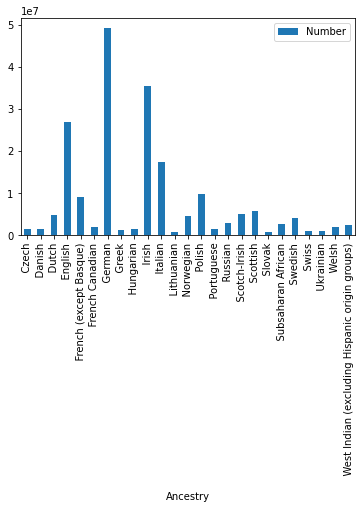

In [78]:
# Load ancestry census data from 2011


# Import correct sheet in file
df = pd.read_csv('./data/5yr/2011_5yr.csv', skiprows=141, nrows = 25)
df.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names
# df = df.rename(columns={"ANCESTRY": "Ancestry", "Unnamed: 1": "Number", "Unnamed: 2": "Margin of Error", "Unnamed: 3": "Percent", "Unnamed: 4": "Percent Margin of Error"})

print(df.head())
labels = df['Ancestry'][1:]
population_data = df['Number'][1:]
df.replace(',','', regex=True, inplace=True)
df['Number'] = df['Number'].astype(int)
df.plot(x="Ancestry", y=["Number"], kind="bar")

                     Ancestry      Number Margin of Error Percent  \
0                       Czech   1,595,844         ±11,247    0.5%   
1                      Danish   1,453,897         ±10,251    0.5%   
2                       Dutch   4,950,041         ±20,785    1.6%   
3                     English  27,403,063         ±59,887    9.0%   
4      French (except Basque)   9,326,180         ±24,686    3.1%   

  Percent Margin of Error  
0                    ±0.1  
1                    ±0.1  
2                    ±0.1  
3                    ±0.1  
4                    ±0.1  


<AxesSubplot:xlabel='Ancestry'>

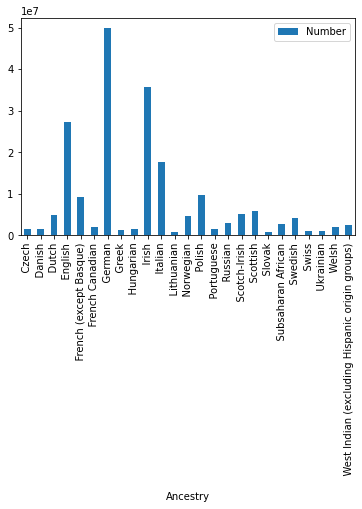

In [79]:
# Load ancestry census data from 2010


# Import correct sheet in file
df = pd.read_csv('./data/5yr/2010_5yr.csv', skiprows=141, nrows = 25)
df.columns=['Ancestry', 'Number', 'Margin of Error', 'Percent', 'Percent Margin of Error']

# Rename column names
# df = df.rename(columns={"ANCESTRY": "Ancestry", "Unnamed: 1": "Number", "Unnamed: 2": "Margin of Error", "Unnamed: 3": "Percent", "Unnamed: 4": "Percent Margin of Error"})

print(df.head())
labels = df['Ancestry'][1:]
population_data = df['Number'][1:]
df.replace(',','', regex=True, inplace=True)
df['Number'] = df['Number'].astype(int)
df.plot(x="Ancestry", y=["Number"], kind="bar")